This is what convinced me to keep dumping money into ~~memecoins~~ the S&P500. Did you know the average middle class American would save 100,000 dollars over 10 years by renting something equivalent to their mortgage instead?

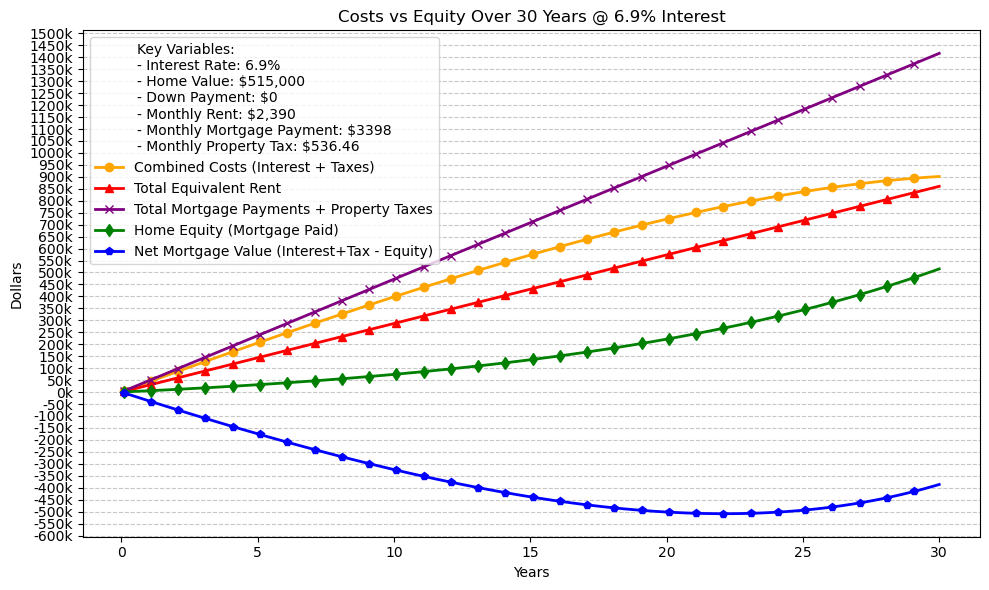

In [78]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

interest_rate = 0.06919  # Annual interest rate (e.g., 0.03 for 3%)
total_home_value = 515_000  # Total value of the home in dollars
down_payment = 0  # Down payment amount in dollars
years = 30  # Loan term in years
monthly_rent = 2390  # Equivalent rent in dollars
property_tax_rate = 0.0125 # property tax rate (averaged on whole value)

# Current formatting function
def currency_format(x, pos):
    return f'{int(x / 1_000)}k'

# Function for generating mortgage charts
def generate_mortgage_chart_with_down_payment(interest_rate, principal, years, total_home_value, down_payment, monthly_rent):
    months = years * 12
    monthly_interest_rate = interest_rate / 12
    loan_amount = total_home_value - down_payment  # Adjusted loan amount
    monthly_payment = loan_amount * (
        monthly_interest_rate * (1 + monthly_interest_rate) ** months
    ) / (
        (1 + monthly_interest_rate) ** months - 1
    )
    
    balance = loan_amount
    cumulative_interest = 0
    cumulative_property_tax = 0
    cumulative_rent = 0
    total_mortgage_plus_tax = []
    combined_costs = []
    total_rent = []
    equity = []
    net_mortgage_value_list = []
    monthly_property_tax = (property_tax_rate * total_home_value) / 12

    
    for month in range(1, months + 1):
        interest_payment = balance * monthly_interest_rate
        principal_payment = monthly_payment - interest_payment
        balance -= principal_payment
        cumulative_interest += interest_payment
        cumulative_property_tax += (property_tax_rate * total_home_value) / 12  # Property taxes based on home value
        cumulative_rent += monthly_rent
        
        total_mortgage_plus_tax.append(monthly_payment * month + cumulative_property_tax)
        combined_costs.append(cumulative_interest + cumulative_property_tax)
        total_rent.append(cumulative_rent)
        current_equity = total_home_value - balance
        equity.append(current_equity)

        
        # Net Mortgage Value = (Interest Payments + Property Taxes) - Equity
        net_mortgage_value_list.append(current_equity - (cumulative_interest + cumulative_property_tax))  # <-- Minimal change

    years = [m / 12 for m in range(1, months + 1)]
    
    plt.figure(figsize=(10, 6))
    plt.plot(years, combined_costs, label='Combined Costs (Interest + Taxes)', color='orange', linewidth=2, marker='o', markevery=12)
    plt.plot(years, total_rent, label='Total Equivalent Rent', color='red', linewidth=2, marker='^', markevery=12)
    plt.plot(years, total_mortgage_plus_tax, label='Total Mortgage Payments + Property Taxes', color='purple', linewidth=2, marker='x', markevery=12)
    plt.plot(years, equity, label='Home Equity (Mortgage Paid)', color='green', linewidth=2, marker='d', markevery=12)
    plt.plot(years, net_mortgage_value_list, label='Net Mortgage Value (Interest+Tax - Equity)', color='blue', linewidth=2, marker='p', markevery=12)  # <-- Added
    
    plt.title(f'Costs vs Equity Over {years[-1]:.0f} Years @ {interest_rate*100:.1f}% Interest')
    plt.xlabel('Years')
    plt.ylabel('Dollars')
    plt.legend(title=(
        f"Key Variables:\n"
        f"- Interest Rate: {interest_rate * 100:.1f}%\n"
        f"- Home Value: ${total_home_value:,.0f}\n"
        f"- Down Payment: ${down_payment:,.0f}\n"
        f"- Monthly Rent: ${monthly_rent:,.0f}\n"
        f"- Monthly Mortgage Payment: ${int(monthly_payment)}\n"
        f"- Monthly Property Tax: ${monthly_property_tax:,.2f}"
    ))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))
    plt.tight_layout()
    plt.grid(axis='y', which='both', linestyle='--', alpha=0.7)
    plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(50_000))
    plt.show()

# Put out the chart
generate_mortgage_chart_with_down_payment(
    interest_rate, 
    total_home_value - down_payment, 
    years, 
    total_home_value, 
    down_payment, 
    monthly_rent
)

Now that's not a promising sight, huh? Well, let's go ahead and see what we could be doing with the money we saved by renting.

The S&P is a good starting point.

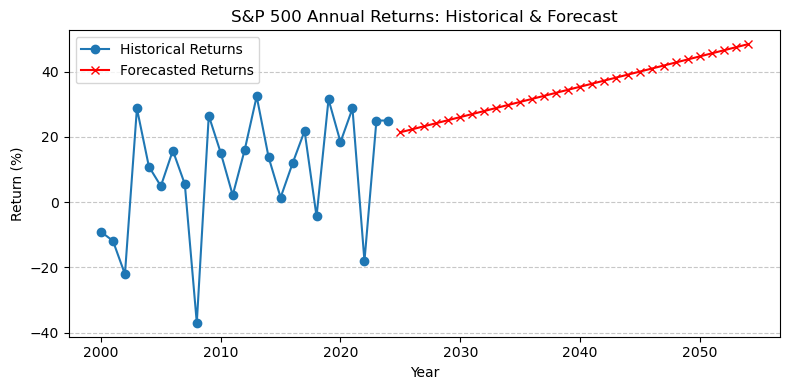

In [79]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


def prepare_sp_data_and_forecast(term_years):
    """
    1) Loads historical S&P 500 data through 2024 (placeholder data).
    2) Performs a linear regression to forecast 'term_years' of annual returns.
    3) Returns:
       - sp_df: DataFrame with all historical data (2000–2024).
       - forecast_years: array of the future years for which we’re forecasting.
       - forecast_returns: array of forecasted annual returns for each year.
    """

    # ------------------------------
    # 1) Placeholder Historical S&P Data (2000–2024)
    #    Includes +25% for 2023 & 2024
    # ------------------------------
    sp_data = {
        'Year': list(range(2000, 2025)),
        'AnnualReturn': [
            -0.091, -0.119, -0.221,  0.287,  0.109,  0.049,  0.158,  0.055,
            -0.370,  0.265,  0.151,  0.021,  0.160,  0.324,  0.137,  0.014,
             0.119,  0.218, -0.044,  0.315,  0.184,  0.287, -0.181,
             0.25,   # 2023 estimate
             0.25    # 2024 estimate
        ]
    }
    sp_df = pd.DataFrame(sp_data)

    # ------------------------------
    # 2) Linear Regression
    # ------------------------------
    X = sp_df[['Year']]         # Predictor
    y = sp_df['AnnualReturn']   # Target
    model = LinearRegression()
    model.fit(X, y)

    # Create a dataframe for the future years to avoid "no valid feature names" warning
    last_year = sp_df['Year'].iloc[-1]
    forecast_years_array = np.arange(last_year + 1, last_year + 1 + term_years)
    forecast_X = pd.DataFrame({'Year': forecast_years_array})
    
    # Predict returns
    forecast_returns = model.predict(forecast_X)

    # We'll pass back just the array for convenience
    return sp_df, forecast_years_array, forecast_returns


def plot_sp_growth_chart(sp_df, forecast_years, forecast_returns):
    plt.figure(figsize=(8, 4))
    # Historical
    plt.plot(
        sp_df['Year'], 
        100 * sp_df['AnnualReturn'], 
        label='Historical Returns',
        marker='o'
    )
    # Forecast
    plt.plot(
        forecast_years, 
        100 * forecast_returns, 
        label='Forecasted Returns',
        marker='x', 
        color='red'
    )
    plt.title('S&P 500 Annual Returns: Historical & Forecast')
    plt.xlabel('Year')
    plt.ylabel('Return (%)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

sp_df, fy, fr = prepare_sp_data_and_forecast(years)
plot_sp_growth_chart(sp_df, fy, fr)


In [80]:
# Uh, I should Probably define this as several function but nobody is going to be maintaining this boilerplate.
# I absolutely should have defined my initial function to pass around a data object with defined values, but iiwii.

# Get out mortgage payment and property tax
months = years * 12
monthly_interest_rate = interest_rate / 12
principal = total_home_value - down_payment

monthly_mortgage_payment = principal * (
    (monthly_interest_rate * (1 + monthly_interest_rate) ** months)
    / ((1 + monthly_interest_rate) ** months - 1)
)
monthly_property_tax = (property_tax_rate * total_home_value) / 12

# Monthly mortgage cost and rent delta
monthly_total_owner_cost = monthly_mortgage_payment + monthly_property_tax
delta = monthly_total_owner_cost - monthly_rent

print("Monthly mortgage payment:  ${:,.2f}".format(monthly_mortgage_payment))
print("Monthly property tax:      ${:,.2f}".format(monthly_property_tax))
print("Total owner cost:          ${:,.2f}".format(monthly_total_owner_cost))
print("Rent vs. Owner Cost Delta: ${:,.2f}".format(delta))

Monthly mortgage payment:  $3,398.34
Monthly property tax:      $536.46
Total owner cost:          $3,934.80
Rent vs. Owner Cost Delta: $1,544.80


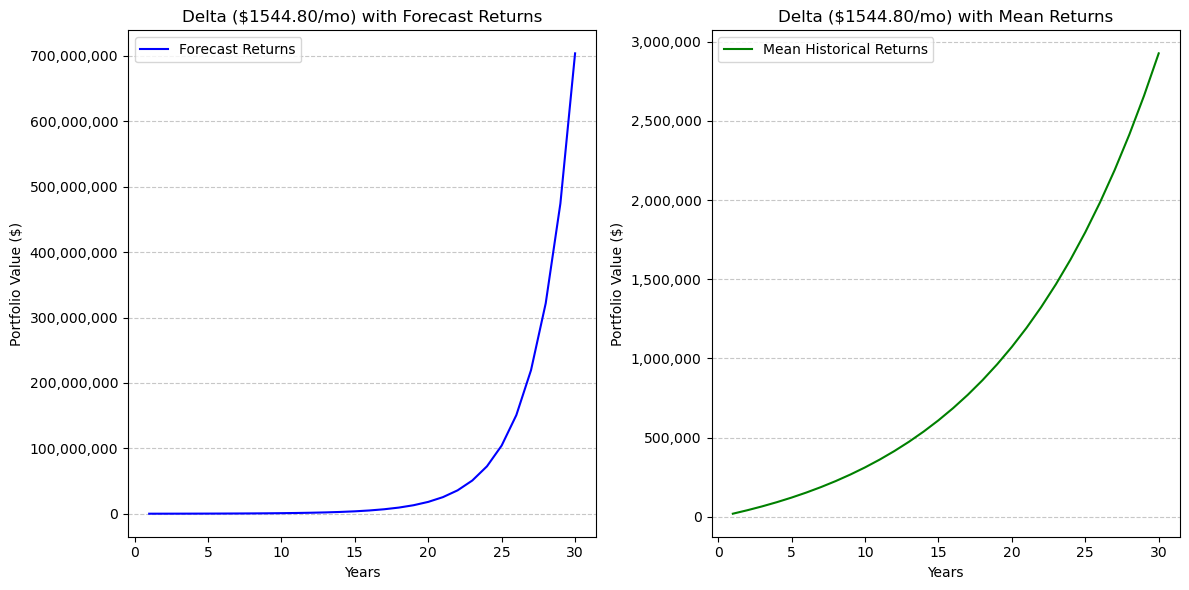

In [81]:
def calc_delta_investment_array(forecast_returns):
    portfolio_values = []
    current_value = 0.0
    for i in range(years):
        current_value += 12 * delta  # Add one year's worth of monthly deposits
        rate = forecast_returns[i] if i < len(forecast_returns) else forecast_returns[-1]
        current_value *= (1 + rate)  # Annual compounding
        portfolio_values.append(current_value)
    return portfolio_values

def calc_constant_mean_investment_array(mean_return, term_years):
    portfolio_values = []
    current_value = 0.0
    for i in range(term_years):
        current_value += 12 * delta  # Add one year's worth of monthly deposits
        current_value *= (1 + mean_return)  # Annual compounding with mean return
        portfolio_values.append(current_value)
    return portfolio_values

def plot_comparison_charts(portfolio_values_forecast, portfolio_values_mean, term_years):
    x_axis_years = range(1, term_years + 1)
    
    plt.figure(figsize=(12, 6))
    
    # Chart 1: Using forecasted returns
    plt.subplot(1, 2, 1)
    plt.plot(x_axis_years, portfolio_values_forecast, color='blue', label='Forecast Returns')
    plt.title(f'Delta (${delta:.2f}/mo) with Forecast Returns')
    plt.xlabel('Years')
    plt.ylabel('Portfolio Value ($)')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    
    # Chart 2: Using mean of historical returns
    plt.subplot(1, 2, 2)
    plt.plot(x_axis_years, portfolio_values_mean, color='green', label='Mean Historical Returns')
    plt.title(f'Delta (${delta:.2f}/mo) with Mean Returns')
    plt.xlabel('Years')
    plt.ylabel('Portfolio Value ($)')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# historical mean data for a better estimate
sp_data = {
    'Year': list(range(2000, 2025)),
    'AnnualReturn': [
        -0.091, -0.119, -0.221,  0.287,  0.109,  0.049,  0.158,  0.055,
        -0.370,  0.265,  0.151,  0.021,  0.160,  0.324,  0.137,  0.014,
         0.119,  0.218, -0.044,  0.315,  0.184,  0.287, -0.181,
         0.25,   # 2023 estimate
         0.25    # 2024 estimate
    ]
}
sp_df = pd.DataFrame(sp_data)
mean_return = sp_df['AnnualReturn'].mean()

portfolio_values_forecast = calc_delta_investment_array(forecast_returns)
portfolio_values_mean = calc_constant_mean_investment_array(mean_return, years)

# Plot the comparison
plot_comparison_charts(portfolio_values_forecast, portfolio_values_mean, years)


Uh, you might notice something that surprised me. The forecasted return is probably a freakishly huge number if your delta was anything over 500 bucks.

That's to be expected, the return on the S&P has been, well, freakish. Like 26,000% since 1952, compared to 2500% for real estate.

If the S&P performs like garbage compared to what it has... you'll probably still beat real-estate.